In [3]:
# Team 1 LendingClub primary notebook
# import dependencies
import pandas as pd
import numpy as np # needed for replace nan code below
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','mths_since_last_delinq','open_acc','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_major_derog','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','pct_tl_nvr_dlq','pub_rec_bankruptcies','tax_liens'
]) for f in
                    glob.glob('data/LoanStats*.csv')], ignore_index=True)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf['int_rate'] = bigdf['int_rate'].str.replace("%","")
bigdf['int_rate'] = pd.to_numeric(bigdf['int_rate'], errors='coerce')

bigdf['loan_amnt'] = bigdf['loan_amnt'].div(1000000).round(2)

#bigdf.to_csv(r'combineddata.csv')



In [4]:
bigdf.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens
0,0.03,36 months,7.34,930.99,3 years,OWN,95000.0,Mar-18,Fully Paid,n,...,13.0,13.0,0.0,19.0,0.0,24.0,10.0,90.0,0.0,0.0
1,0.03,60 months,12.61,785.45,2 years,MORTGAGE,125000.0,Mar-18,Current,n,...,14.0,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0
2,0.00,36 months,7.96,81.43,3 years,MORTGAGE,62000.0,Mar-18,Current,n,...,19.0,19.0,1.0,45.0,0.0,0.0,0.0,100.0,0.0,0.0
3,0.02,60 months,9.92,424.16,3 years,MORTGAGE,110000.0,Mar-18,Current,n,...,8.0,3.0,5.0,8.0,0.0,4.0,0.0,90.9,0.0,0.0
4,0.02,60 months,20.39,454.10,10+ years,RENT,52000.0,Mar-18,Current,n,...,19.0,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0


In [5]:
bigdf=bigdf[bigdf.emp_length!= '10+ years']
bigdf=bigdf[bigdf.emp_length!= 0]
bigdf['emp_length'] = bigdf['emp_length'].str.replace("years","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("year","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("<","")

bigdf['emp_length'] = pd.to_numeric(bigdf['emp_length'], errors='coerce')


In [6]:
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jan-18", 1, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Feb-18", 2, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Mar-18", 3, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Apr-18", 4, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "May-18", 5, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jun-18", 6, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jul-18", 7, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Aug-18", 8, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Sep-18", 9, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Oct-18", 10, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Nov-18", 11, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Dec-18", 12, bigdf['issue_d'])

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

In [7]:
impute_grps = bigdf.pivot_table(values=["int_rate"], index=["issue_d"], aggfunc=np.mean).reset_index()
impute_grps.columns=['Month','Interest Rate']
impute_grps

,Month,Interest Rate
0,1,12.466819
1,2,12.579093
2,3,12.512708
3,4,12.630336
4,5,12.660393
5,6,12.593967
6,7,13.138967
7,8,13.055358
8,9,12.697605
9,10,12.703563


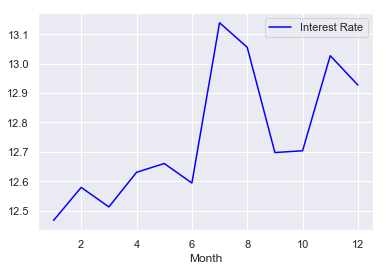

In [8]:
impute_grps.plot(kind='line',x='Month',y='Interest Rate',color='blue')


In [9]:
ct=pd.crosstab(bigdf.emp_length, bigdf.title, values=bigdf.loan_amnt, aggfunc='sum').round(0)
#ct.plot.bar(stacked=True)
#plt.legend(title='mark')
pd.options.display.float_format = '{:,}'.format

ct

title,Business,Car financing,Credit card refinancing,Debt consolidation,Green loan,Home buying,Home improvement,Major purchase,Medical expenses,Moving and relocation,Other,Vacation
emp_length,,,,,,,,,,,,
1,20.0,8.0,336.0,665.0,1.0,13.0,59.0,28.0,9.0,6.0,62.0,2.0
2,8.0,5.0,192.0,381.0,0.0,8.0,35.0,19.0,6.0,3.0,36.0,1.0
3,8.0,4.0,170.0,360.0,0.0,7.0,35.0,15.0,5.0,3.0,34.0,2.0
4,6.0,3.0,129.0,274.0,0.0,6.0,29.0,12.0,4.0,2.0,26.0,1.0
5,6.0,4.0,126.0,279.0,0.0,6.0,32.0,12.0,4.0,2.0,26.0,1.0
6,4.0,2.0,91.0,202.0,0.0,4.0,24.0,8.0,4.0,1.0,16.0,1.0
7,4.0,2.0,76.0,165.0,0.0,4.0,19.0,7.0,3.0,1.0,14.0,1.0
8,3.0,2.0,68.0,151.0,0.0,3.0,18.0,6.0,2.0,1.0,13.0,1.0
9,2.0,1.0,53.0,120.0,0.0,2.0,15.0,5.0,2.0,1.0,10.0,1.0


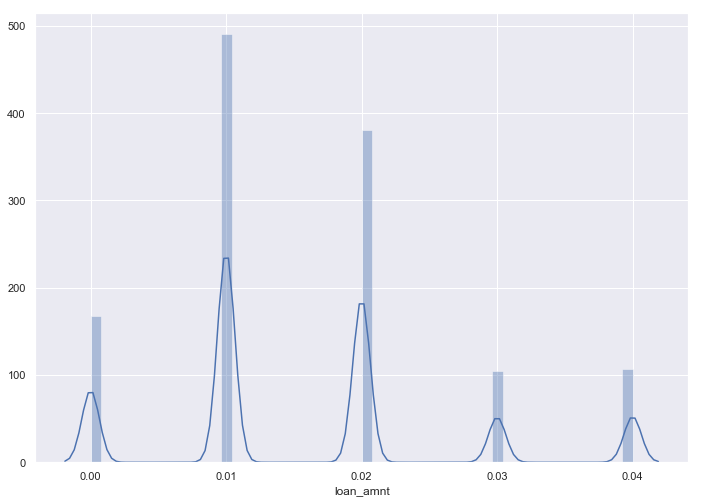

In [31]:

sns.distplot(bigdf.loan_amnt.dropna())



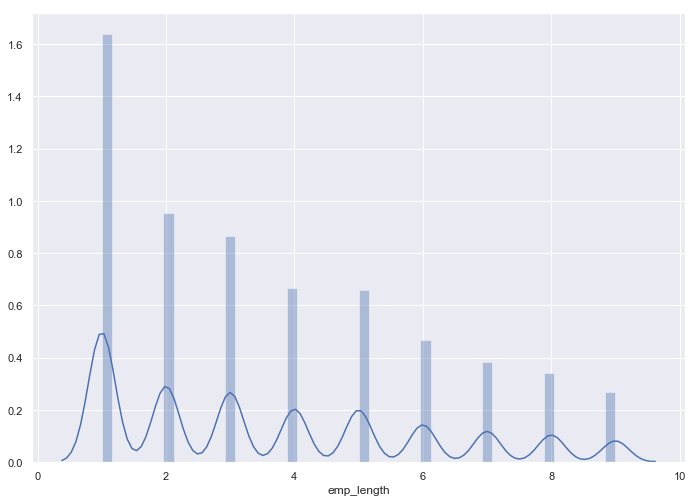

In [32]:
sns.distplot(bigdf.emp_length.dropna())


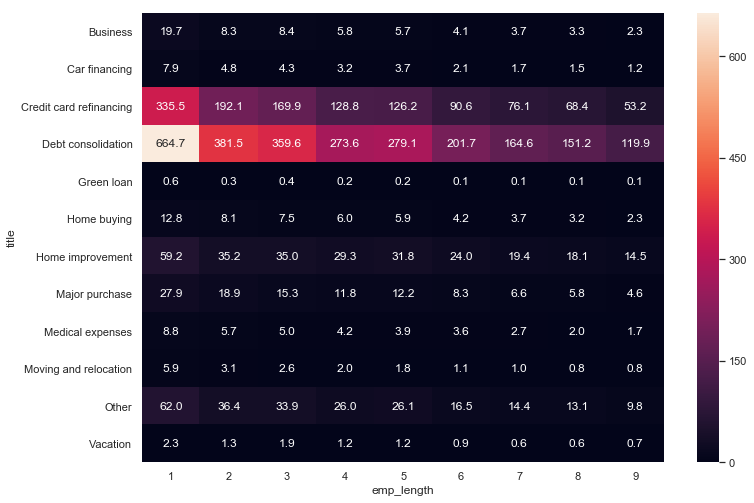

In [10]:
ct = bigdf.pivot_table(index='title',columns='emp_length', values='loan_amnt', aggfunc=np.sum)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(ct, annot=True, fmt=".1f")


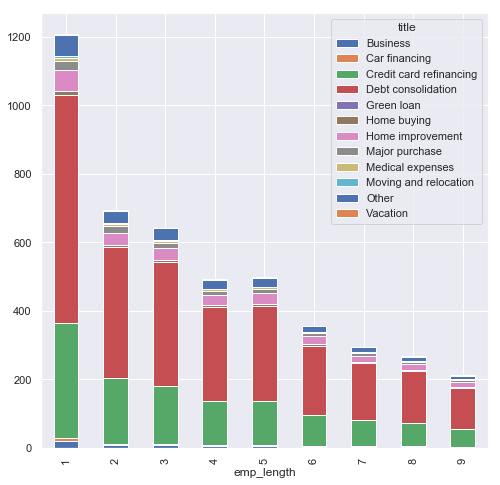

In [33]:
ct.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)